In [4]:
import numpy as np
import struct
from matplotlib import pyplot as plt

In [2]:
def read_complex_data(filename):
  """
  Reads a binary file containing complex numbers (float) appended over time.

  Args:
      filename: The name of the binary file.

  Returns:
      A list of complex numbers (complex<float>) read from the file.
  """
  complex_data = []
  with open(filename, "rb") as f:
    # Read complex numbers (real and imaginary parts) until end of file
    while True:
      try:
        real_part = struct.unpack("f", f.read(4))[0]
        imag_part = struct.unpack("f", f.read(4))[0]
        complex_data.append(complex(real_part, imag_part))
      except struct.error:  # Handle reaching the end of the file
        break

  return np.array(complex_data)

(13211,) complex128


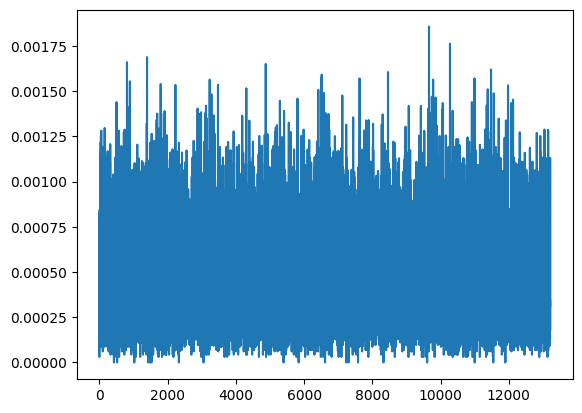

In [80]:
data = read_complex_data("./storage/32C79BE_leaf_test_7.dat")
print(data.shape, data.dtype)
plt.plot(np.abs(data))

In [81]:
N = 1201
M_list = [577]
zfc_seq_list = [np.array([np.exp(-1j * np.pi * M * n * (n + 1) / N) for n in range(N)]) for M in M_list]

7111


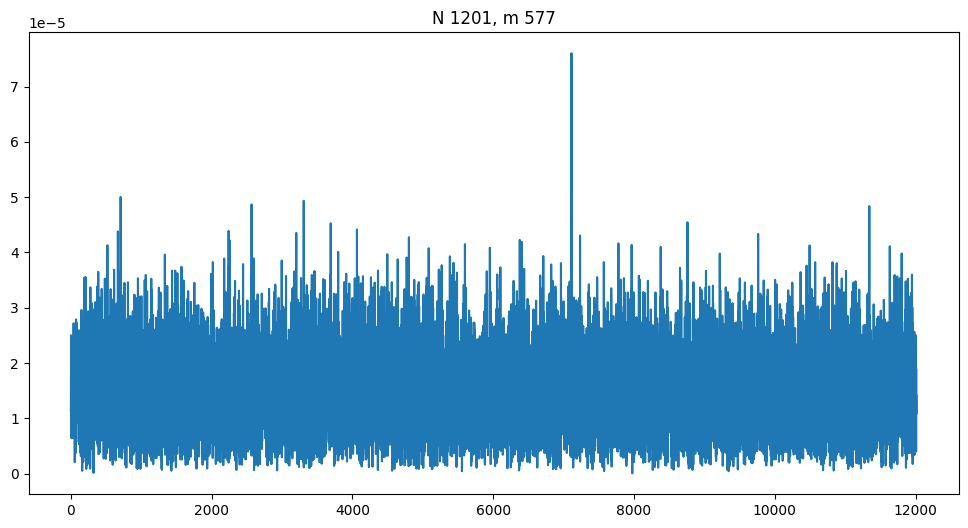

In [82]:
corr_zfc_list = np.array([np.correlate(data, zfc_seq, mode='valid') / N for zfc_seq in zfc_seq_list])
plot_data_list = [np.abs(corr_zfc) for corr_zfc in corr_zfc_list]

fig, ax = plt.subplots(1, 1, figsize=[12,6])
axs = ax

axs.plot(plot_data_list[0])
axs.set_title("N %d, m %d" %(N, M_list[0]))

print(np.argmax(plot_data_list[0]))

# print(np.diff(np.argwhere(plot_data > 60.0).squeeze()))
# print(plot_data[np.argwhere(plot_data > 60.0).squeeze()])
